# Исследование популярности игр

# Цель проекта

Проанализировать исторические данные о продажах игр, оценки пользователей и экспертов. Необходимо выявить закономерности, определяющие успешность игры. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. <br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


##  Изучение данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st


In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм состоит из 16715 строк и 11 колонок. <br>
Есть пропущенные значения в названиях игр, колонке с годом выпуска (тип данных тут float - надо заменить), в жанрах, оценке критиков, оценке пользователей и в колонке с рейтингом от организации ESRB. <br>
Также нам известно, что данные могут быть неполными.

Посмотрим более детально:

In [4]:
df['Name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

Уникальных названий игр меньше, чем всего строк - это могут быть дубликаты строк или данные об одной и той же игре разного года выпуска. 
Самой популярной игрой является Need for Speed: Most Wanted - эта игра упоминается 12 раз.  <br>
Для удобства на этапе предобработки данных надо будет привести все названия к единому регистру.

In [5]:
df['Platform'].describe()

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

Игровых платформ не так уж и много - уникальных значений всего 31. 
Самой популярной платформой является PS2 - 2161 раз. <br>
Также, как и названия игр, названия платформ надо будет привести к единому регистру. 

In [6]:
df.agg({'Year_of_Release':['max','min']})

,Year_of_Release
max,2016.0
min,1980.0


Самая старая игры была выпущена в 1980! А вот самая новенькая - в 2016. 

In [7]:
df['Genre'].describe()
# df['Genre'].unique()

count      16713
unique        12
top       Action
freq        3369
Name: Genre, dtype: object

Уникальных жанров не много - всего 12. <br>
Самым популярным жанром является Action - он упоминается 3369 раз. <br>
Необходимо привести названия к единому регистру.

In [8]:
df['NA_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

Рекорд Северной Америки - 41 миллион копий. И игра, которую чаще всего продавали:

In [9]:
df[df['NA_sales'] == df['NA_sales'].max()]['Name']

0    Wii Sports
Name: Name, dtype: object

Wii Sports! Это та самая игра, где у человечков смешные руки. 41 миллион копий!

In [10]:
df['EU_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

В Европе рекорд чуть пониже - почти 29 миллионов копий. 

In [11]:
df[df['EU_sales'] == df['EU_sales'].max()]['Name']

0    Wii Sports
Name: Name, dtype: object

В Европе первенство тоже за  Wii Sports. 

In [12]:
df['JP_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

В Японии - 10 миллионов. Проверим и тут бестселлер:

In [13]:
df[df['JP_sales'] == df['JP_sales'].max()]['Name']

4    Pokemon Red/Pokemon Blue
Name: Name, dtype: object

а тут в топе - Покемоны! 

In [14]:
df['Other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

In [15]:
df[df['Other_sales'] == df['Other_sales'].max()]['Name']

17    Grand Theft Auto: San Andreas
Name: Name, dtype: object

А в других странах чаще покупали ГТА - было продано 10 с половиной миллионов копий.

In [16]:
df['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

В среднем критики оценивают игры почти 69 баллов (ну, это больше половины - неплохо), самая низкая оценка - 13 баллов, а самая высокая близка к идеалу - 98 баллов.

In [17]:
df[(df['Critic_Score'] == df['Critic_Score'].max())|(df['Critic_Score'] == df['Critic_Score'].min())][['Name', 'Critic_Score']]

,Name,Critic_Score
51,Grand Theft Auto IV,98.0
57,Grand Theft Auto IV,98.0
227,Tony Hawk's Pro Skater 2,98.0
5350,SoulCalibur,98.0
13689,Ride to Hell,13.0


Критики высоко оценили Grand Theft Auto IV, Tony Hawk's Pro Skater 2 и SoulCalibur. А вот Ride to Hell удостоился всего 13 баллов. 

In [18]:
df['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

Так, тут чаще всего встречается tbd (to be determined), что переводится как "подлежит уточнению". Это может быть связано с всплеском активности - как положительных, так и отрицательных оценок. <br>
Уберем из выборки эти строки:

In [19]:
df[df['User_Score'] != 'tbd']['User_Score'].describe()

count     7590
unique      95
top        7.8
freq       324
Name: User_Score, dtype: object

Так как тип данных тут object, то максимальное и минимальное значения посмотреть пока не удастя - проверим это чуть дальше. <br>
Пока можно сказать, что чаще всего пользователи ставят 7,8 баллов. 

In [20]:
df['Rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: Rating, dtype: object

Популярнее всего рейтинг Е ((«Everyone») — «Для всех»). 
Посмотрим, как распредились игры по остальным рейтингам:

In [21]:
df.groupby('Rating')['Name'].count().sort_values(ascending = False)

Rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Name, dtype: int64

На втором месте по популярности - рейтинг Т ((«Teen») — «Подросткам»:), дальше идет М ((«Mature») — «Для взрослых»), также в топе E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше».  <br>
Описание остальных:<br>
EC - («Early childhood») — «Для детей младшего возраста» <br>
RP - («Early childhood») — «Для детей младшего возраста»<br>
K-A - Kids to Adults <br>
AO -  («Adults Only 18+») — «Только для взрослых» <br>


#### Вывод

Провели предварительный обзор данных:<br>
 -  В некоторых из колонок есть пропущенные значения
 -  Названия игр, платформ и жанров необходимо привести к единому регистру
 -  Изменить тип данных в колонке с годом выпуска - сейчас там float.
 -  Изучить подробнее оценки пользователей - например, там есть пропущенные значения и значения tbd.<br>
 
Изучили данные: <br>
- Самой популярной игрой, копии которой продали в количестве 41 млн, является Wii Sports (в топе по продажам в Северной Америке (41 млн копий) и в Европе (28 млн). В Японии предпочли играть в Pokemon Red/Blue (было продано 10 млн копий этой игры), в других странах чаще покупали ГТА. <br>
- ГТА также высоко оценили критики - она получила рекордные 98 баллов. 98 баллов также получили Tony Hawk's Pro Skater 2 и SoulCalibur. 
- Самый низкий рейтинг критиков получила игра Ride to Hell.<br>
- Самым популярным жанром является Action, а самым популярным рейтингом - рейтинг E ((«Everyone») — «Для всех»). 

## Предобработка данных

Начннем по порядку. Столбец Name. Надо было привести названия к единому регистру и при возможности заполнить пропущенные строки или (хотя бы посмотреть, что нет)

In [22]:
df['Name'] = df['Name'].str.lower()

In [23]:
df['Name']

0                           wii sports
1                    super mario bros.
2                       mario kart wii
3                    wii sports resort
4             pokemon red/pokemon blue
                     ...              
16710    samurai warriors: sanada maru
16711                 lma manager 2007
16712          haitaka no psychedelica
16713                 spirits & spells
16714              winning post 8 2016
Name: Name, Length: 16715, dtype: object

In [24]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Тут, к сожалению, слишком мало данных - известна только платформа и продажи - определить название по этим данным не получится. Думаю, две строки можно удалить:

In [25]:
df = df[~df['Name'].isna()]

Посмотрим, изменилось ли количество уникальных значений и самая популярная игра:

In [26]:
df['Name'].describe()

count                           16713
unique                          11559
top       need for speed: most wanted
freq                               12
Name: Name, dtype: object

Нет, в топе все еще NFS. Количество уникальных названий тоже не изменилось.

In [27]:
df['Platform'] = df['Platform'].str.lower()

In [28]:
df['Platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Кажется, тут всё в норме - странные названия платформ есть, но гугл про них знает.

Надо привести год к удобному формату:

In [29]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [30]:
df['Year_of_Release'].isna().mean()

0.016095255190570215

Всего 1,6%. Не думаю, что стоит тратить время и выяснять, в каком году вышла та или иная игра. В некоторых названиях есть год, но не факт, что он соответствует году релиза игры. <br>
Так что избавляемся от пропусков:

In [31]:
df = df[~df['Year_of_Release'].isna()]

In [32]:
df['Year_of_Release'] = df['Year_of_Release'].astype('int')

In [33]:
df['Year_of_Release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: Year_of_Release, Length: 16444, dtype: int64

Отлично! <br>
Двигаемся дальше.

In [34]:
# df[df['Genre'].isna()]
df['Genre'] = df['Genre'].str.lower()

In [35]:
df['Genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Тут все в порядке. 

С продажами все было в порядке - пропущенных значений там не было, тип данных был правильный. <br>
Посмотрим пропущенные значения в оценках:

Начнем с оценок критиков:

In [36]:
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Вряд ли тут что-то можно сделать - даже если будет известно количество проданных копий. Вдруг пользователям игра очень понравилась, а вот критики от неё не в восторге. 
С оценками пользователей - то же самое. <br>

Заменим пропуски в оценкам критиков на условный -1: 

In [37]:
df['Critic_Score'] = df['Critic_Score'].fillna(-1)

In [38]:
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


С оценками пользователей поступим так же:

In [39]:
df['User_Score'] = df['User_Score'].fillna(-1)

In [40]:
df[df['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Как уже было сказано выше, tbd - это всё, что должно быть проверено дополнительно. Заменим эти строки на условный -1 и изменим  тип данных:

In [41]:
df['User_Score'] = df['User_Score'].apply(lambda x: -1 if x == 'tbd' else x)
df['User_Score'] = pd.to_numeric(df['User_Score'])

Теперь можно посмотреть на самую низкую и самую высокую оценку, которую поставили пользователи:

In [42]:
df[['User_Score', 'Name']].query('User_Score != -1').sort_values(by = 'User_Score', ascending = False)

,User_Score,Name
14412,9.7,breath of fire iii
8975,9.6,boktai: the sun is in your hand
3417,9.6,harvest moon: friends of mineral town
10105,9.5,cory in the house
1645,9.5,golden sun: the lost age
...,...,...
13380,0.3,billy the wizard: rocket broomstick racing
5764,0.3,happy feet
9970,0.2,madden nfl 17
13682,0.2,myth makers: trixie in toyland


Самая высокая оценка у breath of fire iii, а самые низкие - у my little pony: pinkie pie's party,myth makers: trixie in toyland и madden nfl 17.
 

In [43]:
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


In [44]:
df['Rating'] = df['Rating'].fillna('unknown')

В Рейтинге пропущенные значения заменим на Unknown.

Добавим столбец с суммарными продажами по всем регионам:

In [45]:
df['total_sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['Other_sales']

### Вывод

Избавились от пропущенных строк, изменили тип данных, привели названия к единому регистру. Добавили данные по суммарным продажам. <br>


Теперь данные можно анализировать, исследовать, строить графики и отчеты.

## Исследовательский анализ данных

Посмотрим, как распределены релизы игр по годам:

In [46]:
games_by_years = df.pivot_table(index = 'Year_of_Release', values = 'Name', aggfunc = 'count')

Text(0.5, 1.0, 'Распределение релизов игр по годам')

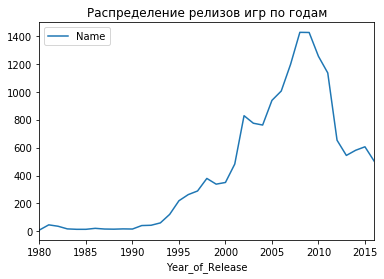

In [47]:
games_by_years.plot()
plt.title('Распределение релизов игр по годам')


Как видим на графике, в 1995 году индустрия игр начала активно развиваться, а уже в 2000 году показала стремительный рост количества выпускаемых игр. <br>
Так что данные до 1995 кажутся уже нерелеватными - игр было мало, их тогдашняя популярность вряд ли может появлиять на нынешние продажи - разве что из чувства ностальгии. 
Оставим в новом датафрейме (старый пока удалять не будем) только игры с датой релиза выше 1995 года:

In [48]:
games = df[df['Year_of_Release'] >= 1995]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15958 entries, 0 to 16714
Data columns (total 12 columns):
Name               15958 non-null object
Platform           15958 non-null object
Year_of_Release    15958 non-null int64
Genre              15958 non-null object
NA_sales           15958 non-null float64
EU_sales           15958 non-null float64
JP_sales           15958 non-null float64
Other_sales        15958 non-null float64
Critic_Score       15958 non-null float64
User_Score         15958 non-null float64
Rating             15958 non-null object
total_sales        15958 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Посмотрим на популярность платформ (по сумме прибыли):

In [49]:
platforms = games.pivot_table(index = 'Platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
platforms

,total_sales
Platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.76
ps,721.55
ps4,314.14
gba,312.88
psp,289.53


Возьмем первые десять из них и посмотрим распределение по годам:

In [50]:
popular_platfroms = platforms.head(10).reset_index()
popular_platfroms

,Platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.76
5,ps,721.55
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


In [51]:
popular_platfroms_data = games[games['Platform'].isin(popular_platfroms['Platform'])]
popular_platfroms_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,-1.0,-1.0,unknown,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01


Построим распределение по годам 

In [52]:
platforms_by_year = popular_platfroms_data.pivot_table(index = 'Year_of_Release', columns = 'Platform', values = 'total_sales', aggfunc = 'sum')
platforms_by_year

Platform,3ds,ds,gba,ps,ps2,ps3,ps4,psp,wii,x360
Year_of_Release,,,,,,,,,,
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,56.67,2.07,184.31,NaN,NaN,NaN,NaN,NaN


Nan свидетельствуют о том, что в опреденный год релизов на платформе не было. <br>
Интересно, например, как сменяли друг друга версии PS: ps со временем заменили на ps2, ps3, ps4. <br>
Относительно новыми являются 3ds, ps4 (первые игры начали продавать в 2011 и в 2013 соответственно). <br>
Популярность GBA длилась недолго - с 2000 по 2007. 

И посмотрим на графике:

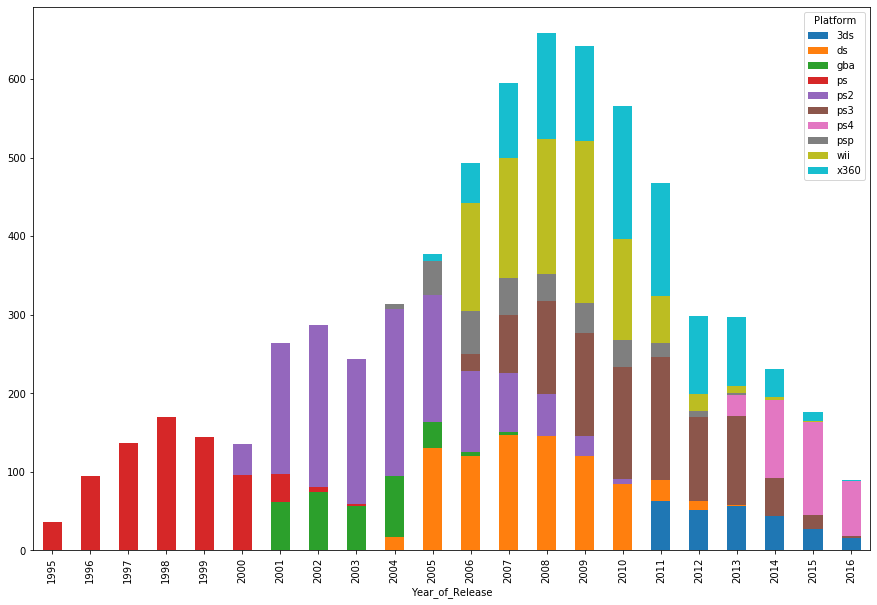

In [53]:
platforms_by_year.plot(kind= 'bar', stacked=True, figsize  = (15, 10))

Text(0.5, 1.0, 'Распределение платформ по годам')

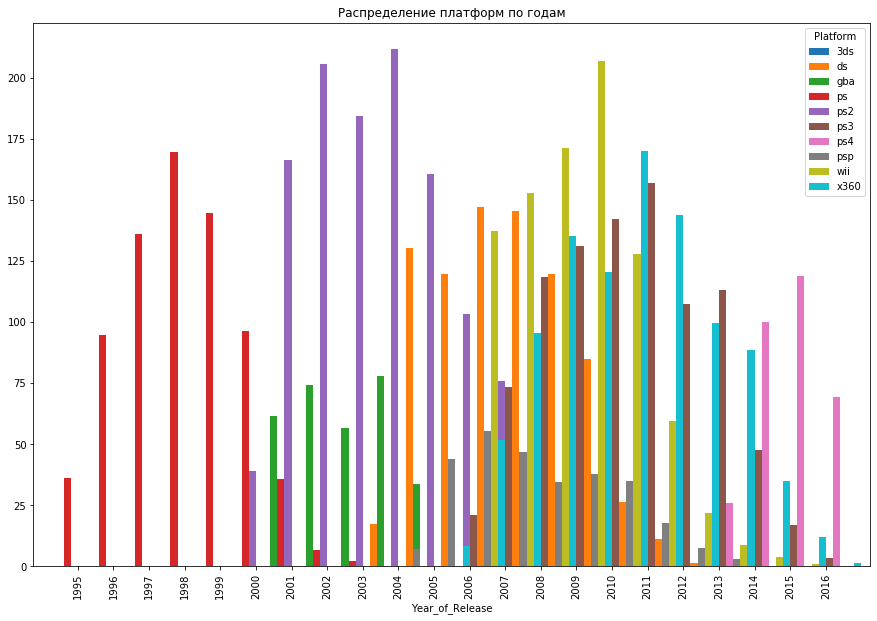

In [54]:
platforms_by_year.plot(kind= 'bar', width=2, figsize  = (15, 10))
plt.title('Распределение платформ по годам')

На данных графиках наглядно заметно, как постепенно исчезали одни платформы и появлялись другие. Интересен также период с 2005 по 2011 - большое разнообразие игровых платформ привело также и к росту продаж в целом. 

Посмотрим отдельно данные за последние 5 лет:

Text(0.5, 1.0, 'Распределение продаж по платформам по годам')

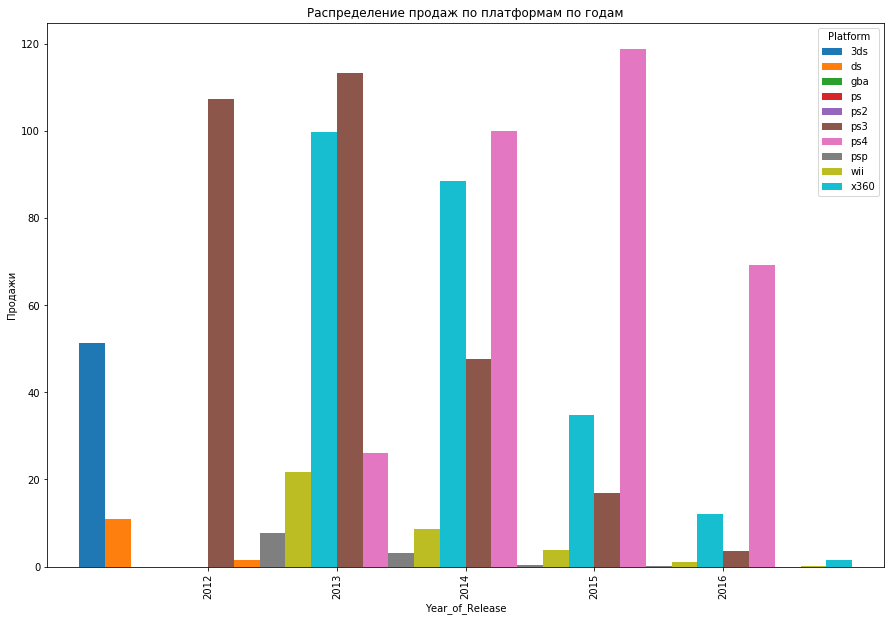

In [55]:
platforms_by_year.tail(5).plot(kind= 'bar', width=2, figsize  = (15, 10))
plt.ylabel('Продажи')
plt.title('Распределение продаж по платформам по годам')

Самой продаваемой платформой является PlayStation - в 2013 на смену ps3 пришла ps4. Также популярной платформой является XOne. 

Посмотрим, какая платформа принесла больше всего прибыли за последние 3 года:

In [56]:
top_platforms = popular_platfroms_data.query('Year_of_Release >= 2013').groupby('Platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
top_platforms

,Platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,3ds,143.25
3,x360,136.80
4,wii,13.66
5,psp,3.50
6,ds,1.54


(0, 2.5)

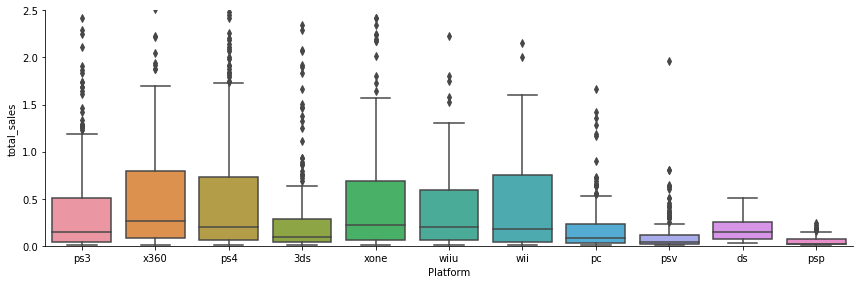

In [57]:
games_2013 = games[games['Year_of_Release'] >= 2013]


sns.catplot(x="Platform", 
            y='total_sales', 
            kind="box", 
            data=games_2013, 
            height=4, 
            aspect=3)
plt.ylim(0, 2.5)

В топе - ps3, x360, ps4 и 3ds. Т.к. PS4 - это более новая версия PS3, к тройке лидеров добавим x360. 

Посмотрим, как влияют на продажи оценки критиков и игроков:

Возьмем в качестве примера PS4:

In [58]:
ps4 = games[games['Platform'] == 'ps4']
ps4

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,shin hayarigami 2,ps4,2016,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16526,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,carmageddon: max damage,ps4,2016,action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Построим диаграмму рассеяния (уберем из выборки значения -1):

Text(0.5, 1.0, 'Зависимость продаж от оценки критиков')

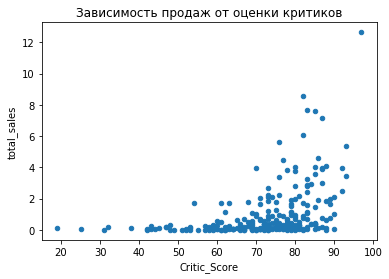

In [59]:
ps4_critics_score = ps4.query('Critic_Score != -1')
ps4_critics_score.plot(x='Critic_Score', y='total_sales', kind='scatter') 
plt.title('Зависимость продаж от оценки критиков')

In [60]:
print(ps4_critics_score['Critic_Score'].corr(ps4_critics_score['total_sales']))

0.40656790206178095


По диаграмме рассеяния видно, что чем выше рейтинг критиков - тем чаще покупают игры. <br>
Также интересно выделяется одна точка в верхнем правом углу - самая высокая оценка и рекордные продажи: Grand Theft Auto V. <br>
Интересно было бы посмотреть на оценки Call of Duty: black ops 3 - в сумме было продано 14.63 млн копий этой игры. 

Text(0.5, 1.0, 'Зависимость продаж от оценки пользователей')

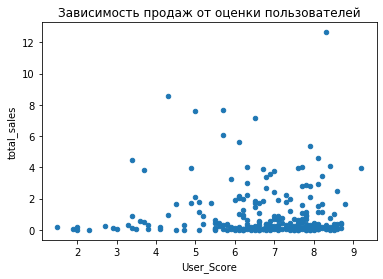

In [61]:
ps4_users_score = ps4.query('User_Score != -1')
ps4_users_score.plot(x='User_Score', y='total_sales', kind='scatter') 
plt.title('Зависимость продаж от оценки пользователей')

А вот тут зависимость не такая очевидная - да, с ростом оценок растут и продажи, но например, заметны хорошие продажи у игр со средней оценкой - 4-6.

In [62]:
print(ps4_users_score['User_Score'].corr(ps4_users_score['total_sales']))

-0.031957110204556424


Коэффициент корреляции близок к нулю - линейной зависимости между величинами нет.

Посмотрим популярность жанров:

In [63]:
games.groupby('Genre')['Name'].count().sort_values(ascending = False)

Genre
action          3222
sports          2238
misc            1701
role-playing    1434
adventure       1280
shooter         1247
racing          1203
simulation       842
platform         808
fighting         792
strategy         658
puzzle           533
Name: Name, dtype: int64

In [64]:
games.groupby('Genre')['total_sales'].sum().sort_values(ascending = False)

Genre
action          1645.07
sports          1258.33
shooter          967.94
role-playing     888.47
misc             773.67
racing           692.41
platform         611.83
fighting         402.57
simulation       379.12
adventure        210.25
strategy         166.88
puzzle           158.37
Name: total_sales, dtype: float64

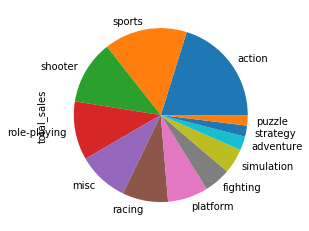

In [65]:
games.groupby('Genre')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'pie')

Самым популярным и прибыльным жанром является Action. На втором месте - Sports. <br>
Жанр Misc, хоть и третий по популярности жанр, но по продажам он уступает жанрам Shooter и Role-playing.  <br>
 А вот меньше всего прибыли принесли игры в жанрах Strategy и Puzzle. (их и выпускают гораздо реже)

### Вывод

Проверили исследовательский анализ игр: <br>
   -  В 2005 году игровая индустрия начала активно развиваться - количество выпускаемых игр начало увеличиваться, стали появляться новые платформы, выросла общее количество проданных копий. У пользователей появился выбор, что, скорее всего, и привело к росту продаж. 
   - Самыми популярными (и перспективными) игровыми платформами являются PS и XBox.
   - По диаграмме рассения определили зависимость продаж от оценки критиков - чем выше оценка, тем больше проданных копий. 
   - А вот от оценки пользователей продажи зависят не так сильно. Видимо, к критикам прислушиваются чаще.
   - Самым популярным и продаваемым жанром является Action. На последнем месте по популярности - Паззлы (есть предположения, что собирать паззлы вживую все-таки интереснее, поэтому их редко покупают в электронном формате). 


## Исследование данных по регионам

Посмотрим популярные платформы и жанры в разных регионах:

In [66]:
def popular (param, column):
    return(games.groupby(param)[column].sum().sort_values(ascending = False).head() ,
           games.groupby(param)[column].sum().sort_values(ascending = False).head().plot(kind = 'pie')
                     )

(Platform
 x360    595.74
 ps2     572.92
 wii     486.87
 ps3     390.13
 ds      380.31
 Name: NA_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdacea94d90>)

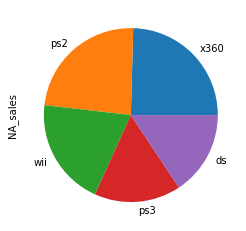

In [67]:
popular('Platform', 'NA_sales')


В Северной Америке в топе Xbox, PlayStation, Wii и DS.

(Platform
 ps2     332.63
 ps3     327.21
 x360    268.32
 wii     258.32
 ps      211.19
 Name: EU_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdacecfa110>)

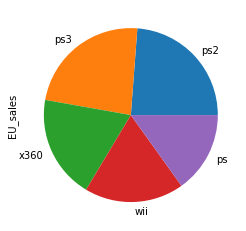

In [68]:
popular('Platform', 'EU_sales')

В Европе ситуация похожая - в топе PS, X360 и Wii.

(Platform
 ds     175.00
 ps2    137.54
 ps     137.11
 3ds    100.62
 ps3     79.41
 Name: JP_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdacea17510>)

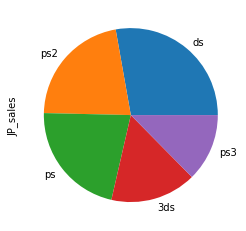

In [69]:
popular('Platform', 'JP_sales')

Интересно, что в Японии на первом месте по популярности - DS. Но PS также в топ-5. 

(Platform
 ps2     190.47
 ps3     134.59
 x360     84.88
 wii      77.71
 ds       59.04
 Name: Other_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb5b6a8e10>)

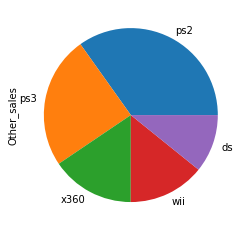

In [70]:
popular('Platform', 'Other_sales')

Среди популярных платформ - PS, X360, Wii и DS.

Посмотрим популярные жанры:

(Genre
 action     814.11
 sports     655.07
 shooter    527.59
 misc       392.43
 racing     342.82
 Name: NA_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdacec1f350>)

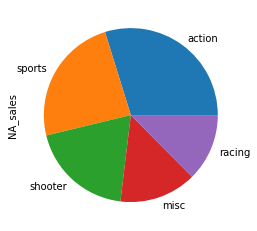

In [71]:
popular('Genre', 'NA_sales')

(Genre
 action     814.11
 sports     655.07
 shooter    527.59
 misc       392.43
 racing     342.82
 Name: NA_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdace9d3390>)

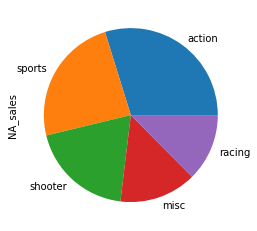

In [72]:
popular('Genre', 'NA_sales')

В Северной Америке самым популярным жанром является Action. Дальше идут sports, shooter, misc и замыкает пятерку жанр racing.

(Genre
 action     503.35
 sports     367.35
 shooter    308.23
 racing     230.32
 misc       208.88
 Name: EU_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdacec89710>)

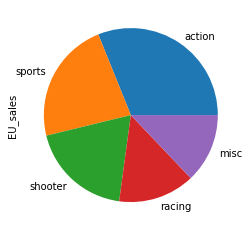

In [73]:
popular('Genre', 'EU_sales')

В Европе распределение похожее: на первом месте - action, на втором - sports. 3 и 4 место делят shooter и racing, а вот на 5 - misc.

(Genre
 role-playing    315.17
 action          146.46
 sports          104.31
 misc             99.51
 platform         77.05
 Name: JP_sales, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdacecb6a90>)

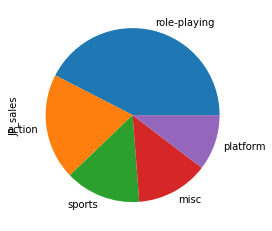

In [74]:
popular('Genre', 'JP_sales')

А вот в Японии на первом месте - role-playing жанр. С сильным отставанием от первого места идут action, sports, misc и platform. 

Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Для начала избавимся от строк с Unknown в Рейтинге:

In [75]:
ratings = games[games['Rating'] != 'unknown']

In [76]:
def popular_rating (param, column):
    return(ratings.groupby(param)[column].sum().sort_values(ascending = False).head(),
          ratings.groupby(param)[column].sum().sort_values(ascending = False).plot(x = param, y = column, kind = 'bar'),
          plt.ylabel(column))

(Rating
 E       1274.24
 T        747.19
 M        742.87
 E10+     345.50
 K-A        2.56
 Name: NA_sales, dtype: float64,
 Text(0, 0.5, 'NA_sales'))

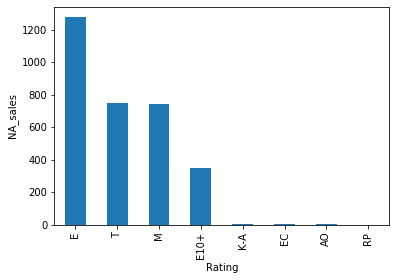

In [77]:
popular_rating('Rating', 'NA_sales')

В явных фаворитах - игры категории Е (для всех), что неудивительно, конечно. Практически наравне идут категории Т и М. 

Больше всего прибыли приносят игры рейтинга Е -(«Everyone 10 and older») — "Для всех от 10 лет и старше". На втором месте  - T (игры для подростков).

(Rating
 E       703.87
 M       480.00
 T       420.73
 E10+    183.33
 AO        0.61
 Name: EU_sales, dtype: float64,
 Text(0, 0.5, 'EU_sales'))

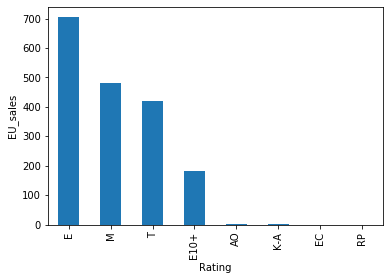

In [78]:
popular_rating('Rating', 'EU_sales')

Тут то же самое - на первом месте игры "Для всех от 10 лет", а вот второе место уже принадлежит играм с рейтингом М - «Для взрослых»), на третьем - T (игры для подростков).

(Rating
 E       197.96
 T       150.17
 M        63.58
 E10+     40.20
 K-A       1.46
 Name: JP_sales, dtype: float64,
 Text(0, 0.5, 'JP_sales'))

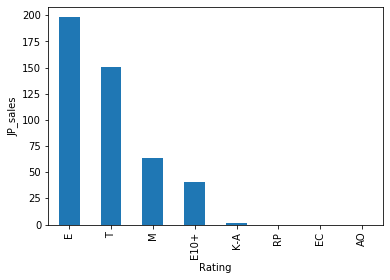

In [79]:
popular_rating('Rating', 'JP_sales')

### Вывод

В целом популярные жанры в регионах мало чем отличаются - экшены на первом месте, остальные места в топ-5 делят гонки, спортивные игры, шутеры и файтинги. На фоне этого сильно отличаются интересы Японии: там на первом месте игры жанра role-playing.  <br>
Популярность платформ в регионах тоже схожа - в топе разные версии PS, X360. А вот в Японии с сильным отрывом идет DS. <br>
Самой популярной категорией игр является категория Е, также часто покупают игры с рейтингом T, М и чуть реже- Е10+. В целом ситуация по регионам мало чем отлиается. Очень редко покупают игры с рейтингом К-А, RP, EC и AO.



## Проверка гипотез

Проверим две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости - 0.05


In [80]:
xbox = games[(games['User_Score'] != -1) & (games['Platform'] == 'xone')].User_Score
pc = games[(games['User_Score'] != -1) & (games['Platform'] == 'pc')].User_Score
 


In [81]:
print('Дисперсия оценок пользователей Xbox:', xbox.var(ddof=1))
print('Дисперсия оценок пользователей PC:', pc.var(ddof=1))

Дисперсия оценок пользователей Xbox: 1.9069968429360695
Дисперсия оценок пользователей PC: 2.3231900019831713


Проверим гипотезы методом (определение уровня значимости критерия Стьюдента) ttest_ind, т.к. дисперсии для выборок различаются, используем аргумент equal_var=False: 

In [82]:
alpha = .05

results = st.ttest_ind(xbox, pc, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.442937492775816e-06
Отвергаем нулевую гипотезу


In [83]:
print('Средняя оценка игр платформы Xbox One', round(xbox.mean(), 2))
print('Средняя оценка игр платформы PC', round(pc.mean(), 2))

Средняя оценка игр платформы Xbox One 6.52
Средняя оценка игр платформы PC 7.07


Различия в средних оценках действительно есть.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Сформируем гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости - 0.05


In [84]:
actions = games[(games['User_Score'] != -1) & (games['Genre'] == 'action')].User_Score
sports = games[(games['User_Score'] != -1) & (games['Genre'] == 'sports')].User_Score


In [85]:
print('Дисперсия оценок пользователей выборки Action:', actions.var(ddof=1))
print('Дисперсия оценок пользователей выборки Sports:', sports.var(ddof=1))

Дисперсия оценок пользователей выборки Action: 2.027493768262496
Дисперсия оценок пользователей выборки Sports: 2.623055812519272


Проверим гипотезы методом (определение уровня значимости критерия Стьюдента) ttest_ind, т.к. дисперсии для выборок различаются, используем аргумент equal_var=False:

In [86]:
alpha = .05

results = st.ttest_ind(actions, sports, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


In [87]:
print('Средняя оценка игр жанра Action', round(actions.mean(),2))
print('Средняя оценка игр жанра Sports', round(sports.mean(), 2))

Средняя оценка игр жанра Action 7.06
Средняя оценка игр жанра Sports 6.95


Средние оценки действительно практически не различаются. 

### Вывод

Проверили две гипотезы методом t-test и сделали следующие выводы: <br>
       1. Средние пользовательские рейтинги платформ Xbox One и PC различаются <br>
       2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») практически не различаются.

## Общий вывод

1. Провели анализ данных и сделали следующие выводы:<br>
- Самой популярной игрой, копии которой продали в количестве 41 млн, является Wii Sports (в топе по продажам в Северной Америке (41 млн копий) и в Европе (28 млн). В Японии предпочли играть в Pokemon Red/Blue (было продано 10 млн копий этой игры), в других странах чаще покупали ГТА. <br>
- ГТА также высоко оценили критики - она получила рекордные 98 баллов. 98 баллов также получили Tony Hawk's Pro Skater 2 и SoulCalibur. 
- Самый низкий рейтинг критиков получила игра Ride to Hell.<br>
- Пользователи же высоко оценили  Breath of fire III, а самые низкие оценки были поставлены играм My little pony: pinkie pie's party и Myth makers: trixie in toyland и madden nfl 17.<br>
- Самым популярным жанром является Action, а самым популярным рейтингом - рейтинг E ((«Everyone») — «Для всех»). 
2. Провели исследовательский анализ данных: <br>
   -  В 2005 году игровая индустрия начала активно развиваться - количество выпускаемых игр начало увеличиваться, стали появляться новые платформы, выросла общее количество проданных копий. У пользователей появился выбор, что, скорее всего, и привело к росту продаж. 
   - Самыми популярными (и перспективными) игровыми платформами являются PS и XBox.
   - По диаграмме рассения определили зависимость продаж от оценки критиков - чем выше оценка, тем больше проданных копий. 
   - А вот от оценки пользователей продажи зависят не так сильно. Видимо, к критикам прислушиваются чаще.
   - Самым популярным и продаваемым жанром является Action. На последнем месте по популярности - Паззлы (есть предположение, что собирать паззлы вживую все-таки интереснее, поэтому их редко покупают в электронном формате).
   
3. Исследовали популярность жанров и игровых платформ в разных регионах:
    - В целом популярные жанры в регионах мало чем отличаются - экшены на первом месте, остальные места в топ-5 делят гонки, спортивные игры, шутеры и файтинги. На фоне этого сильно отличаются интересы Японии: там на первом месте игры жанра role-playing.  <br>
    -Популярность платформ в регионах тоже схожа - в топе разные версии PS, X360. А вот в Японии с сильным отрывом идет DS. <br>
    - Самой популярной категорией игр является категория Е, также часто покупают игры с рейтингом T, М и чуть реже- Е10+. В целом ситуация по регионам мало чем отлиается. Очень редко покупают игры с рейтингом К-А, RP, EC и AO.

4. Проверили две гипотезы методом t-test и сделали следующие выводы: <br>
       - Средние пользовательские рейтинги платформ Xbox One и PC различаются 
       - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») практически не различаются.
       
      
### На основании проделанной работы и всего вышеперечисленного:
Потенциально перспективный и популярный продукт выглядит так:
- Платформа: PS4 -самая новая версия PlayStation, которая на протяжении почти 20 лет с самой первой PS была в топе по количеству выпускаемых игр и по продажам, или XBox.
- Жанр: Action (является самым популярным и продаваемым жанром во всех регионах, кроме Японии)
- Возрастная категория: E (в топе во всех регионах)
- Следует также присмотреться к оценкам критиков - их оценки, в отличие от оценок пользователей, оказывают влияние на продажи.

